In [1]:
# dependencies
import torch
import numpy as np
from torchvision.models import resnet18
import torch.optim as optim
from torch import nn
from torchvision.datasets import CIFAR10
from torch.utils.data import DataLoader
import torchvision.transforms as transforms

#################### Your Code ####################
ROOT_PATH=globals()['_dh'][0]  # Jupyter Notebook hack to get location of notebook file, https://stackoverflow.com/a/53958599
###################################################

BATCH_SIZE=1024

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_dataset = CIFAR10(root=ROOT_PATH, download=True, train=True, transform=transform)
eval_dataset = CIFAR10(root=ROOT_PATH, train=False, transform=transform)

train_data_loader = DataLoader(dataset=train_dataset, num_workers=4, batch_size=BATCH_SIZE, shuffle=True)
eval_data_loader = DataLoader(dataset=eval_dataset, num_workers=4, batch_size=BATCH_SIZE, shuffle=False)

Files already downloaded and verified


In [2]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [3]:
def test(eval_data_loader, model, file):
    """
    Test a PyTorch model on a given data loader.

    Args:
        eval_data_loader (torch.utils.data.DataLoader): A PyTorch DataLoader object containing the evaluation data.
        model (torch.nn.Module): The PyTorch model to test.
        file (str): The filename of the saved model weights to load.

    Returns:
        None
    """
    # initialize correct predictions count
    correct = 0
    # load saved model weights
    model.load_state_dict(torch.load(file))
    # move model to device (GPU or CPU)
    model.to(device)
    # set model to evaluation mode (turns off dropout and other features used during training)
    model.eval()
    # iterate over all batches in the evaluation data loader
    with torch.no_grad():
        for batch in eval_data_loader:
            # split images and labels, move to device
            images, labels = batch
            images = images.to(device)
            labels = labels.to(device)
            # forward propagation
            out = model(images)
            # get predicted class from output probabilities (i.e. index of maximum value)
            out = out.argmax(dim = 1)
            # count number of correct predictions
            correct += (out == labels).sum().cpu().item()
        # print final accuracy
        print(correct, len(eval_dataset), correct/len(eval_dataset))

7548 10000 0.7548


In [ ]:
model = nn.Sequential(
    nn.Conv2d(3, 32, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2),
    nn.Conv2d(32, 64, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2),
    nn.Conv2d(64, 128, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2),
    nn.Flatten(),
    nn.Linear(128*4*4, 512),
    nn.ReLU(),
    nn.Linear(512, 10))
test(eval_data_loader, model, 'model_weights_cnn_final.pth')
    

In [26]:
model_dnn = nn.Sequential(
    nn.Flatten(),
    nn.Linear(3*32*32, 1024),
    nn.ReLU(),
    nn.Dropout(p=0.5),
    nn.Linear(1024, 512),
    nn.ReLU(),
    nn.Dropout(p=0.5),
    nn.Linear(512, 256),
    nn.ReLU(),
    nn.Dropout(p=0.5),
    nn.Linear(256, 128),
    nn.ReLU(),
    nn.Dropout(p=0.5),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Linear(64, 10))
    
test(eval_data_loader, model_dnn, 'model_weights_dnn_final.pth')

5739 10000 0.5739


<Axes: title={'center': 'DNN First Try Convergence'}, xlabel='epoch', ylabel='loss'>

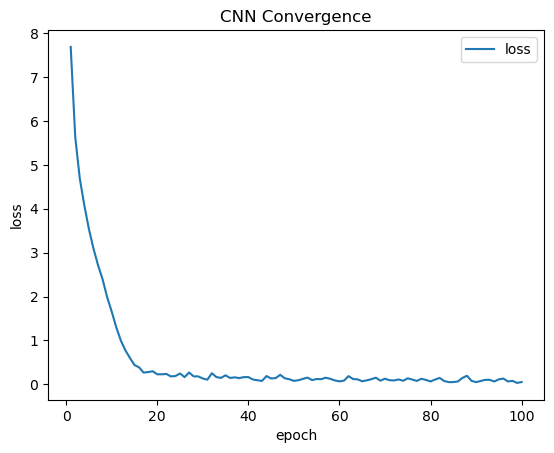

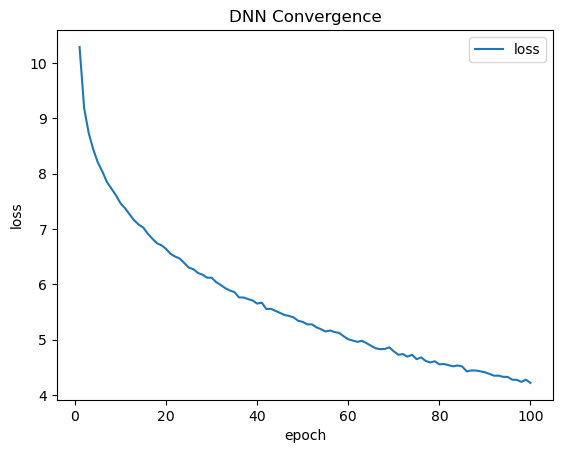

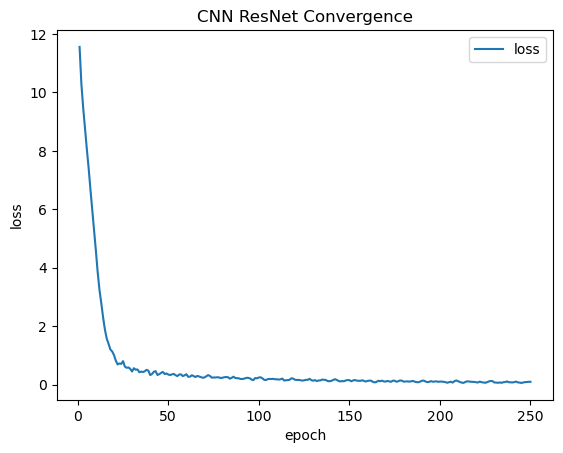

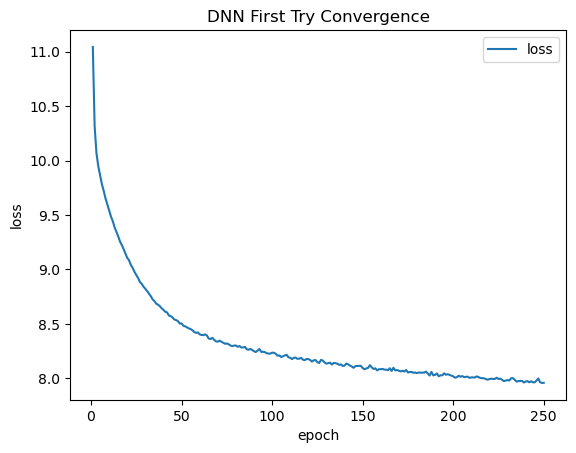

In [7]:
import pandas as pd

cnn_convergence = pd.read_csv("cnn_data.csv")
dnn_convergence = pd.read_csv("dnn_data.csv")
cnn__resnet_convergence = pd.read_csv("cnn_data_resnet18.csv")
dnn_convergence_first = pd.read_csv('dnn_data_first.csv')

cnn_convergence.plot(x = 'epoch', y = 'loss', xlabel= 'epoch', ylabel= 'loss', title= 'CNN Convergence')
dnn_convergence.plot(x = 'epoch', y = 'loss', xlabel= 'epoch', ylabel= 'loss', title= 'DNN Convergence')

cnn__resnet_convergence.plot(x = 'epoch', y = 'loss', xlabel= 'epoch', ylabel= 'loss', title= 'CNN ResNet Convergence')
dnn_convergence_first.plot(x = 'epoch', y = 'loss', xlabel= 'epoch', ylabel= 'loss', title= 'DNN First Try Convergence')